In [1]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
train_input.shape

(60000, 28, 28)

In [3]:
test_input.shape

(10000, 28, 28)

In [4]:
train_input[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [5]:
train_target[0]

9

In [2]:
import numpy as np

In [3]:
import tensorflow as tf

In [4]:
from sklearn.model_selection import train_test_split

In [67]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 784) / 255
test_scaled = test_input.reshape(-1, 784) / 255

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2)

dense1 = keras.layers.Dense(100, activation = 'relu', input_shape = (784,))
dense2 = keras.layers.Dense(10, activation = 'softmax')

model = keras.Sequential([dense1, dense2])
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy', optimizer = 'adam')

history = model.fit(train_scaled, train_target, epochs = 20, validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5325 - accuracy: 0.8144 - val_loss: 0.4396 - val_accuracy: 0.8458
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3958 - accuracy: 0.8575 - val_loss: 0.4083 - val_accuracy: 0.8494
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3544 - accuracy: 0.8734 - val_loss: 0.3639 - val_accuracy: 0.8673
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3291 - accuracy: 0.8807 - val_loss: 0.3492 - val_accuracy: 0.8700
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3116 - accuracy: 0.8849 - val_loss: 0.3332 - val_accuracy: 0.8787
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2939 - accuracy: 0.8915 - val_loss: 0.3371 - val_accuracy: 0.8757
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2828 - accuracy: 0.8957 - val_loss: 0.3187 - val_accuracy:

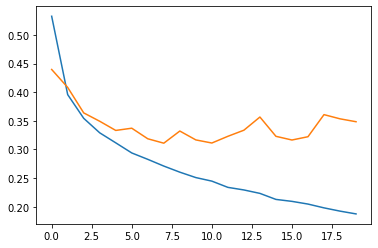

In [68]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [69]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3484 - accuracy: 0.8796


[0.3484422266483307, 0.8795833587646484]

In [70]:
model.evaluate(train_scaled, train_target)

1500/1500 [==============================] - 2s 1ms/step - loss: 0.1857 - accuracy: 0.9291


[0.185709148645401, 0.9291041493415833]

In [ ]:
# 시험데이터 정확도가 훈련데이터보다 더 높게 나왔을때
# 둘다 낮을때

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255
test_scaled = test_input / 255

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2)

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28, 28)))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.4)) # 속도 빨라지고, 과대적합 막아준다.
model.add(keras.layers.Dense(10, activation = 'softmax'))

checkpoint = keras.callbacks.ModelCheckpoint('best.h5')
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy', optimizer = 'adam')

history = model.fit(train_scaled, train_target, epochs = 1000, validation_data=(val_scaled, val_target), callbacks = [checkpoint, early_stopping])

Epoch 1/1000
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6353 - accuracy: 0.7776 - val_loss: 0.4320 - val_accuracy: 0.8447
Epoch 2/1000
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4697 - accuracy: 0.8323 - val_loss: 0.4044 - val_accuracy: 0.8494
Epoch 3/1000
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4325 - accuracy: 0.8435 - val_loss: 0.3712 - val_accuracy: 0.8624
Epoch 4/1000
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4145 - accuracy: 0.8501 - val_loss: 0.3721 - val_accuracy: 0.8662
Epoch 5/1000
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3972 - accuracy: 0.8547 - val_loss: 0.3599 - val_accuracy: 0.8683
Epoch 6/1000
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3891 - accuracy: 0.8575 - val_loss: 0.3646 - val_accuracy: 0.8681
Epoch 7/1000
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3783 - accuracy: 0.8616 - val_loss: 0.3400 -

In [ ]:
model.summary()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [85]:
model.save('model.h5')

In [86]:
model2 = keras.models.load_model('model.h5')
model2.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3417 - accuracy: 0.8797


[0.34173113107681274, 0.8796666860580444]

In [5]:
# 인공신경망 딥러닝 구현
# CNN : 이미지를 위한 딥러닝 : 이미지의 특징을 학습하는 인공신경망

#from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

# 이미지가 흑백인지, 칼라인지
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2)

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size = (3, 3), activation = 'relu', padding = 'same', input_shape = (28, 28, 1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation = 'softmax'))

checkpoint = keras.callbacks.ModelCheckpoint('best.h5')
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy', optimizer = 'adam')

# 2080Ti -> 20배
history = model.fit(train_scaled, train_target, epochs = 1000, validation_data=(val_scaled, val_target), callbacks = [checkpoint, early_stopping])

Epoch 1/1000
1500/1500 [==============================] - 67s 43ms/step - loss: 0.5320 - accuracy: 0.8108 - val_loss: 0.3513 - val_accuracy: 0.8708
Epoch 2/1000
1500/1500 [==============================] - 57s 38ms/step - loss: 0.3480 - accuracy: 0.8762 - val_loss: 0.2968 - val_accuracy: 0.8934
Epoch 3/1000
1500/1500 [==============================] - 58s 39ms/step - loss: 0.3001 - accuracy: 0.8918 - val_loss: 0.2686 - val_accuracy: 0.9019
Epoch 4/1000
1500/1500 [==============================] - 56s 38ms/step - loss: 0.2666 - accuracy: 0.9034 - val_loss: 0.2461 - val_accuracy: 0.9083
Epoch 5/1000
1500/1500 [==============================] - 56s 38ms/step - loss: 0.2415 - accuracy: 0.9115 - val_loss: 0.2372 - val_accuracy: 0.9100
Epoch 6/1000
1500/1500 [==============================] - 56s 38ms/step - loss: 0.2200 - accuracy: 0.9190 - val_loss: 0.2314 - val_accuracy: 0.9117
Epoch 7/1000
1500/1500 [==============================] - 56s 37ms/step - loss: 0.2072 - accuracy: 0.9239 - val_

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [7]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 4s 11ms/step - loss: 0.2453 - accuracy: 0.9203


[0.24530896544456482, 0.9203000068664551]

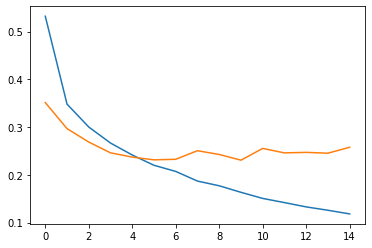

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

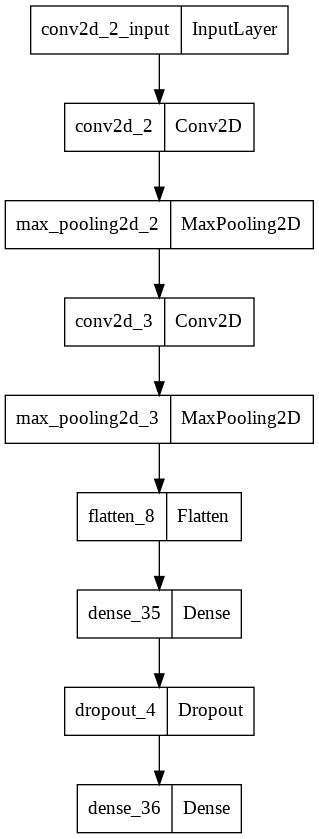

In [98]:
keras.utils.plot_model(model)

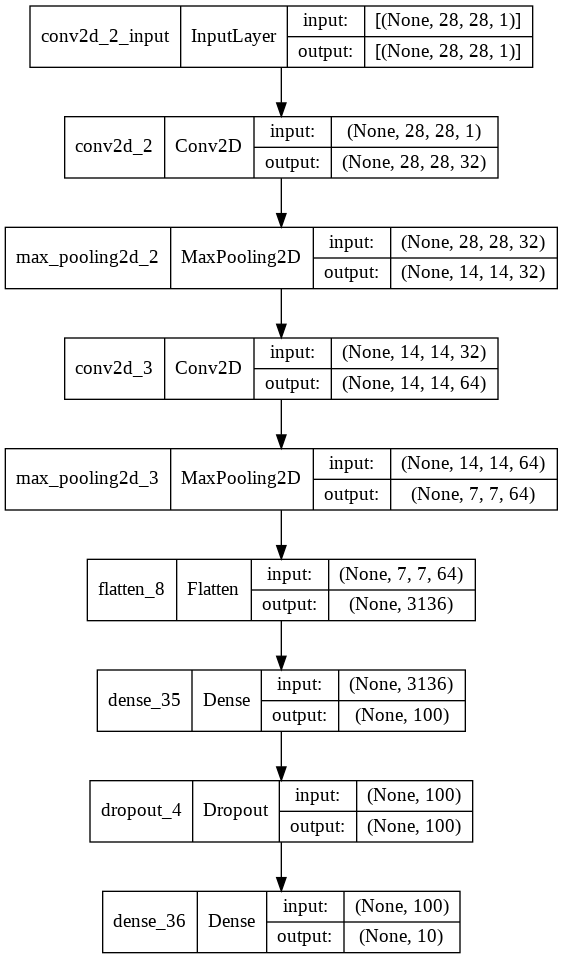

In [99]:
keras.utils.plot_model(model, show_shapes=True)

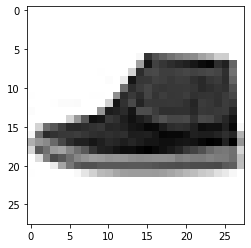

In [10]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap = 'gray_r')

In [11]:
model.predict(val_scaled[0].reshape(1, 28, 28, 1))

array([[1.3200956e-06, 2.2488391e-12, 7.0197287e-10, 8.9905804e-08,
        8.7652309e-11, 1.6083645e-06, 2.4309134e-07, 2.1992400e-01,
        4.1295007e-08, 7.8007275e-01]], dtype=float32)

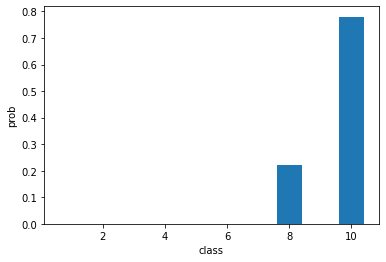

In [12]:
plt.bar(range(1, 11), model.predict(val_scaled[0].reshape(1, 28, 28, 1))[0])
plt.xlabel('class')
plt.ylabel('prob')
plt.show()

In [13]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클부츠']
classes[np.argmax(model.predict(val_scaled[0].reshape(1, 28, 28, 1)))]

'앵클부츠'

In [14]:
# 이미지 딥러닝
# RNN : 시계열 데이터

model.layers

In [15]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [16]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.029310925 0.27559254


(array([ 2.,  2.,  2.,  1.,  3., 22., 72., 96., 75., 13.]),
 array([-1.5119642 , -1.3093562 , -1.1067481 , -0.9041401 , -0.7015321 ,
        -0.49892408, -0.29631606, -0.09370802,  0.1089    ,  0.31150803,
         0.51411605], dtype=float32),
 <a list of 10 Patch objects>)

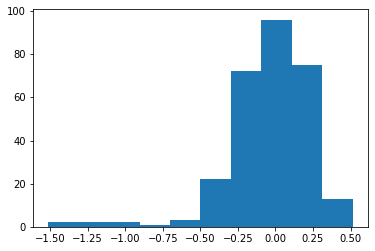

In [17]:
plt.hist(conv_weights.reshape(-1, 1))

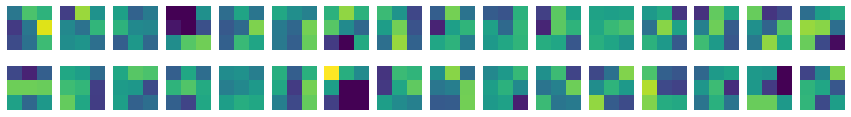

In [18]:
fig, axs = plt.subplots(2, 16, figsize = (15, 2))

for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:, :, 0, i*16 + j], vmin = -0.5, vmax = 0.5)
    axs[i,j].axis('off')

plt.show()

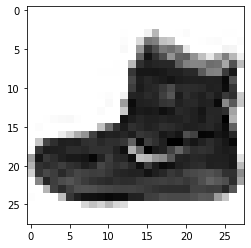

In [19]:
plt.imshow(train_input[0], cmap = 'gray_r')

In [20]:
conv_acti = keras.models.Model(model.input, model.layers[0].output)
inputs = train_input[:1].reshape(-1, 28, 28, 1) / 255
feature_maps = conv_acti.predict(inputs)
feature_maps.shape

(1, 28, 28, 32)

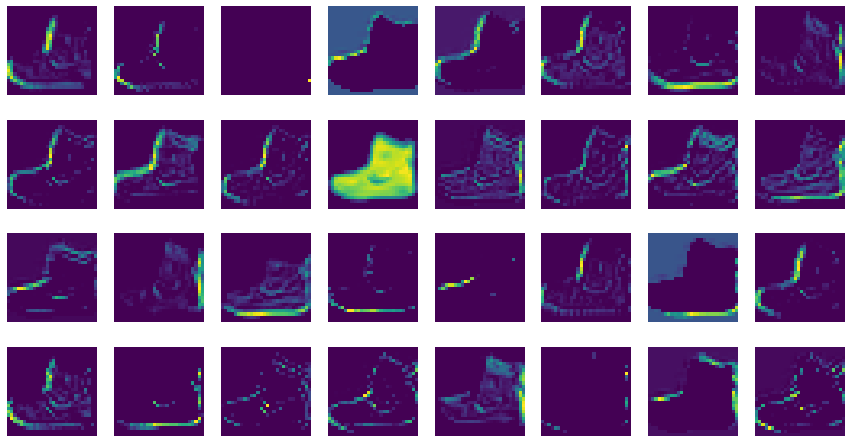

In [22]:
fig, axs = plt.subplots(4, 8, figsize = (15, 8))

for i in range(4):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0, :, :, i*8+j])
    axs[i,j].axis('off')

plt.show()

In [25]:
conv2_acti = keras.models.Model(model.input, model.layers[2].output)

inputs = train_input[:1].reshape(-1, 28, 28, 1) / 255
feture_maps = conv2_acti.predict(inputs)

In [26]:
feture_maps.shape

(1, 14, 14, 64)

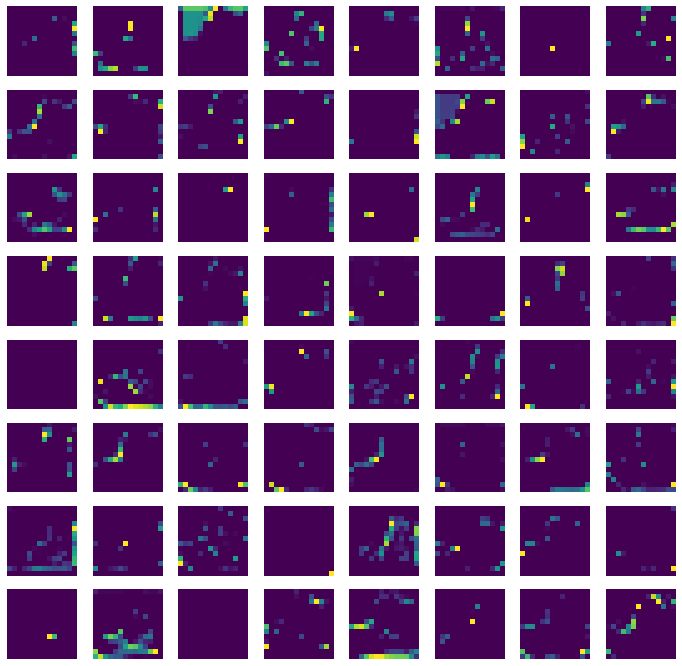

In [27]:
fig, axs = plt.subplots(8, 8, figsize = (12, 12))

for i in range(8):
  for j in range(8):
    axs[i,j].imshow(feture_maps[0, :, :, i*8+j])
    axs[i,j].axis('off')

plt.show()

In [28]:
from tensorflow.keras.datasets import imdb

In [29]:
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words = 500) # 가장 빈도높은 단어 500개만

17473536/17464789 [==============================] - 0s 0us/step


In [30]:
train_input.shape

(25000,)

In [31]:
test_input.shape

(25000,)

In [32]:
train_input[0] # 빈도높은단어 500개만 // 500등안에 못든단어는 모두 2

[1,
 14,
 22,
 16,
 43,
 2,
 2,
 2,
 2,
 65,
 458,
 2,
 66,
 2,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 2,
 112,
 50,
 2,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 2,
 2,
 17,
 2,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2,
 19,
 14,
 22,
 4,
 2,
 2,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 2,
 38,
 76,
 15,
 13,
 2,
 4,
 22,
 17,
 2,
 17,
 12,
 16,
 2,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2,
 2,
 16,
 480,
 66,
 2,
 33,
 4,
 130,
 12,
 16,
 38,
 2,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 2,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 2,
 5,
 2,
 36,
 71,
 43,
 2,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 2,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 28,
 224,
 92,
 25,
 104,
 4,
 226,
 65,
 16,
 38,
 2,
 88,
 12,
 16,


In [35]:
len(train_input[2])

141

In [36]:
train_target # 1 긍정적인 리뷰 0 부정적인 리뷰

array([1, 0, 0, ..., 0, 1, 0])

In [37]:
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.2)

In [39]:
# 리뷰 길이가 다 다른데 어떡하나 -> 잘라야됩니다.

from tensorflow.keras.preprocessing.sequence import pad_sequences

In [40]:
train_seq = pad_sequences(train_input, maxlen = 100, ) # 뒷부분 자르고 싶으면 : truncating='post'
val_seq = pad_sequences(val_input, maxlen = 100)
test_seq = pad_sequences(test_input, maxlen = 100)

In [41]:
train_seq.shape

(20000, 100)

In [42]:
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape = (100, 500)))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [43]:
train_oh = keras.utils.to_categorical(train_seq)
val_oh = keras.utils.to_categorical(val_seq)
test_oh = keras.utils.to_categorical(test_seq)

In [44]:
train_seq[0]

array([  2, 471,  19,  90,  95,   7, 265,   2,   4, 130,   4,   2,   2,
         5, 225,   4,   2,   2,  57, 147,   2,   2,  40,   4,  22,   2,
        21,  43, 160,   2, 114,   2,   8,   2,   4,  65, 367,   2,  36,
        93,   6,   2,   5,   2,   5,  32,   4, 360,   7,   4, 177, 385,
       145,  13, 440,  36, 188,   2,   6, 176,   7,   2,  88,  14,  86,
        22,   9, 184,  78,   4,   2,   2,  12,   2,   5,   2,   2,   7,
       101,   2,  97,  12,  33, 211,   2,  55,  78,  22,  21,  13, 188,
         8,   2,  15,  13, 181,   8,  67,   4,   2], dtype=int32)

In [46]:
train_oh[0]

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [47]:
checkpoint = keras.callbacks.ModelCheckpoint('best.h5')
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

model.compile(loss = 'binary_crossentropy', metrics = 'accuracy', optimizer='adam')

history = model.fit(train_oh, train_target, validation_data = (val_oh, val_target), epochs=10000, callbacks=[checkpoint, early_stopping])

Epoch 1/10000
625/625 [==============================] - 28s 43ms/step - loss: 0.6904 - accuracy: 0.5301 - val_loss: 0.6848 - val_accuracy: 0.5484
Epoch 2/10000
625/625 [==============================] - 15s 25ms/step - loss: 0.6704 - accuracy: 0.5867 - val_loss: 0.6666 - val_accuracy: 0.5882
Epoch 3/10000
625/625 [==============================] - 14s 23ms/step - loss: 0.6132 - accuracy: 0.6652 - val_loss: 0.5623 - val_accuracy: 0.7250
Epoch 4/10000
625/625 [==============================] - 15s 23ms/step - loss: 0.5043 - accuracy: 0.7591 - val_loss: 0.5157 - val_accuracy: 0.7580
Epoch 5/10000
625/625 [==============================] - 15s 23ms/step - loss: 0.4679 - accuracy: 0.7846 - val_loss: 0.5099 - val_accuracy: 0.7668
Epoch 6/10000
625/625 [==============================] - 14s 23ms/step - loss: 0.4475 - accuracy: 0.7965 - val_loss: 0.4846 - val_accuracy: 0.7726
Epoch 7/10000
625/625 [==============================] - 14s 23ms/step - loss: 0.4293 - accuracy: 0.8063 - val_loss: 0

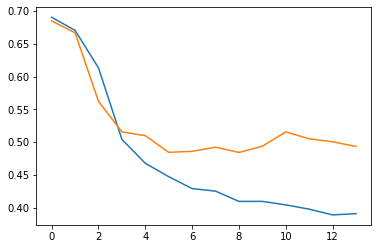

In [48]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])